In [19]:
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

#Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix

## Importing final dataset

In [3]:
file = 'final_df.csv'
final_df = pd.read_csv(file)

In [4]:
final_df.drop('Unnamed: 0', axis = 1,inplace = True)
final_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.083337  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

___

## Data Visualization

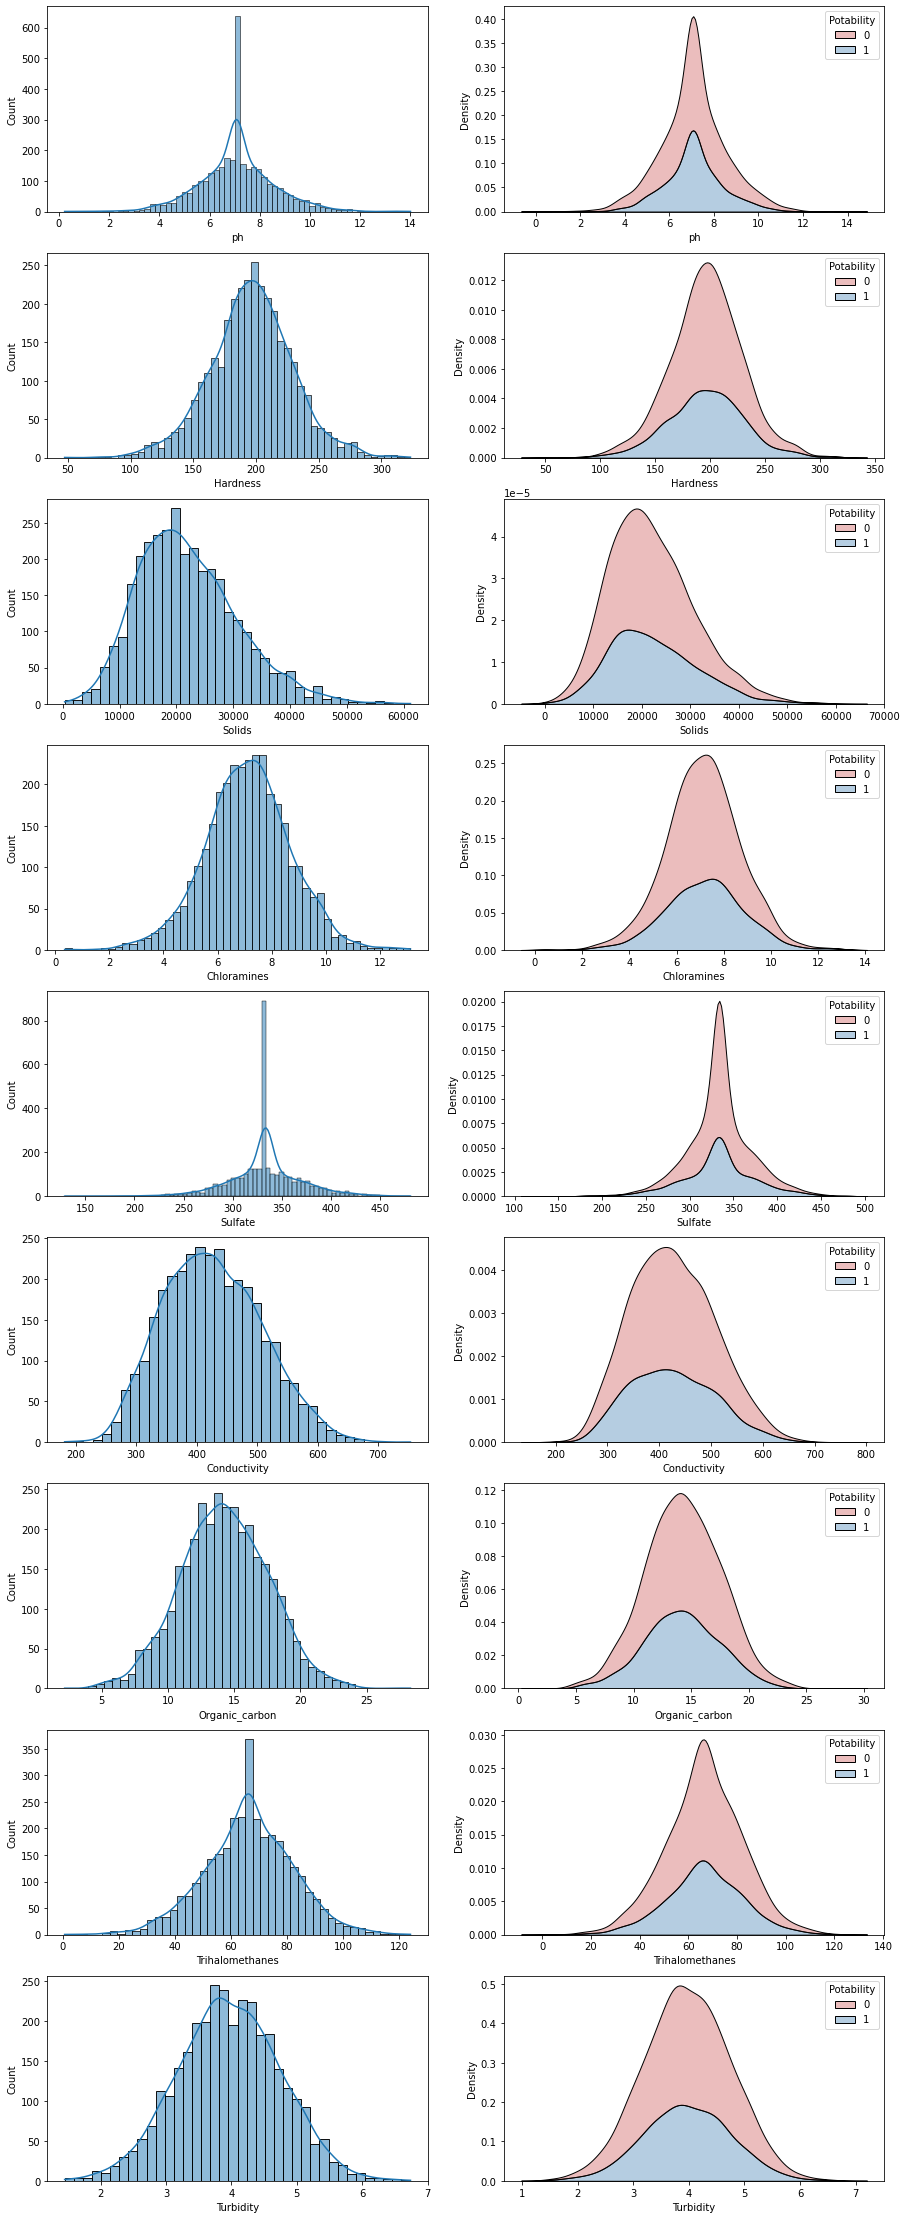

In [5]:
#Creating a list of features from the dataset to iterate through 
features = list(final_df.columns.drop(['Potability']))

#Establishing plots and plot sizes
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(15, 40))
i = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(final_df, x=col, kde=True, ax = ax[i,0]) 
    
    #Setting hue as 'Potability' to see how it is affected
    sns.kdeplot(final_df[col], fill=True, alpha=0.4, hue = final_df.Potability, 
    palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i,1])
    
    i = i + 1

___

## Assessing correlation between features in the dataset

In [6]:
#Creating a correlation matrix to determine how correlated features are in the dataset
corr_matrix = final_df.corr()
corr_matrix

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.076937 -0.077549    -0.031205  0.014468   
Hardness         0.076937  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.077549 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031205 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014468 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.020109 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.037256  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.004055 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.034537 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.004495 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.020109        0.037256         0.004055  -0.034537   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.004495  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

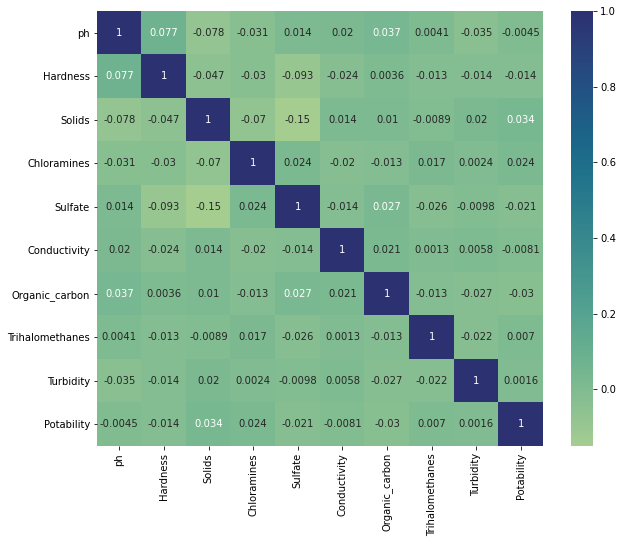

In [7]:
#Creating a heatmap of the correlation matrix for easier visual analysis
plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, cmap = 'crest', annot = True)
plt.savefig('heatmap.png')

**There is no multicollinearity among features in the dataset because none of the Pearson's Correlation Coefficients are close to -1 or 1. Next I will create a list of the features and how they correlate with the target feature, Potability.**

In [8]:
#Instantiate an empty list of correlation values
corr = list()

#Looping through the previous list of features to determine correlation with target feature, 'Potability'
for cols in features:
    corr.append(final_df[cols].corr(final_df['Potability']))
    
#Converting new correlation list to a pandas dataframe
corr_df = pd.DataFrame({'Features' : features, 'corr': corr})

#Finding the absolute values to be able to correctly order values 
corr_df['corr'] = corr_df['corr'].abs()

#Ordering the values in descending orders to see which features are most correlated with the target feature
corr_df.sort_values(by = 'corr', ascending = False)

Features      corr
2           Solids  0.033743
6   Organic_carbon  0.030001
3      Chloramines  0.023779
4          Sulfate  0.020619
1         Hardness  0.013837
5     Conductivity  0.008128
7  Trihalomethanes  0.006960
0               ph  0.004495
8        Turbidity  0.001581

In [9]:
df = final_df
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.083337  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Creating Train/Test Split

In [10]:
#Seperating the target feature 
X = df.drop('Potability', axis = 1).copy()
y = df['Potability'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Applying SMOTE (Synthetic Minority Oversampling Technique) to the Data

In [11]:
#Instantiating the SMOTE function
smt = SMOTE()

#Getting a count of the pre-smote data
pre_smt_counter = Counter(y_train)

#Resampling the data with the SMOTE
X_train, y_train = smt.fit_resample(X_train, y_train)

#Getting a count of the post-smote data
post_smt_counter = Counter(y_train)

#Printing the results
print('Before SMOTE', pre_smt_counter)
print('After SMOTE', post_smt_counter)

Before SMOTE Counter({0: 1601, 1: 1019})
After SMOTE Counter({0: 1601, 1: 1601})


## Identifying the Best Models

In [15]:
#List of models to be tested
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), 
         KNeighborsClassifier(), BaggingClassifier()]

#Empty lists to append for analysis
mod = []
precision_score = []
accuracy_score = []
f1_score = []

#Creating a for loop to test all models with generic parameters
for m in models:
    accuracy_score.append(cross_val_score(m, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1).mean())
    f1_score.append(cross_val_score(m, X_train, y_train, scoring = 'f1', cv = 5, n_jobs = -1).mean())
    precision_score.append(cross_val_score(m, X_train, y_train, scoring = 'precision', cv = 5, n_jobs = -1).mean())
    mod.append(m)

#Creating the DataFrame for analysis
model_df = pd.DataFrame(columns = ['model', 'precision',  'accuracy', 'f1'])
model_df['model'] = mod
model_df['precision'] = precision_score
model_df['accuracy'] = accuracy_score
model_df['f1'] = f1_score
model_df.sort_values(by=['precision'], ascending = False).style.background_gradient(subset='precision')

**The RandomForestClassifier, BaggingClassifier, and GradientBoostingClassifier models are the 3 best performing ones. Next I will start to fine tune the hyperparameters.**

## Creating a Random Forest Classifier With Randomized Grid Search

In [16]:
#Hyperparameters to manipulate

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#Number of features to be considered at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Creating the param grid
rf_param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

In [17]:
#Instantiateing the RandomForestClassifier
rf = RandomForestClassifier()

#Instantiating the RandomGrid
rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, scoring = 'precision', cv = 10, verbose = 2, n_jobs = -1)

#Fitting the data to the RandomGrid
rf_grid.fit(X_train, y_train)

#Predicting using the fitted RandomGrid model
y_pred_rf_grid = rf_grid.predict(X_test)

#Printing the best params
print('Best Parameters: ', rf_grid.best_params_)

#Printing the best score
print('Best Score: ', rf_grid.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters:  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 43, 'bootstrap': True}
Best Score:  0.7295279581097796


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       397
           1       0.55      0.50      0.53       259

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



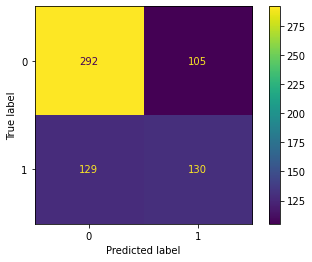

In [18]:
#Printing the classification report
print(classification_report(y_test, y_pred_rf_grid))

#Printing the confusion matrix
print(plot_confusion_matrix(rf_grid, X_test, y_test))

In [28]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf_grid)
auc_rf = auc(rf_fpr, rf_tpr)

In [40]:
from numpy import arange
from numpy import argmax 
from sklearn.datasets import make_classification

def to_labels(pos_probs, threshold):
    return(pos_probs >= threshold).astype('int')


yhat = rf_grid.predict_proba(X_test)

probs = yhat[:,1]

thresholds = arange(0,1,0.001)

scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

ix = argmax(scores)

print('Threshold= %.3F, F-Score = %.5f' % (thresholds[ix], scores[ix]))

Threshold= 0.378, F-Score = 0.61067


In [41]:
test_y_pred = (rf_grid.predict_proba(X_test)[:,1] >= 0.378).astype(bool)

In [42]:
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.34      0.48       397
           1       0.47      0.88      0.61       259

    accuracy                           0.55       656
   macro avg       0.64      0.61      0.55       656
weighted avg       0.68      0.55      0.53       656



## Creating a Bagging Classifier With Grid Search

In [128]:
#Hyperparameters to use in model
n_estimators_bag = [10, 50, 100, 500, 1000]

#Creating the parameter grid
param_grid_bag = {'n_estimators': n_estimators_bag}

In [129]:
#Instantiating the BaggingClassifier
bag_model = BaggingClassifier()

#Instantiating the GridSearch
bagging_GridSearch = GridSearchCV(bag_model, param_grid = param_grid_bag, cv = 5, n_jobs = -1)

#Fitting the data to the GridSearch
bagging_GridSearch.fit(X_train, y_train)

#Predicting using the fitted Bagging GridSearch model
y_pred_bagging = bagging_GridSearch.predict(X_test)

#Printing the best parameters and the best score from the Bagging GridSearch model
print('Best Parameters: ', bagging_GridSearch.best_params_)

print('Best Score: ', bagging_GridSearch.best_score_)

Best Parameters:  {'n_estimators': 500}
Best Score:  0.7020879018450655


              precision    recall  f1-score   support

           0       0.70      0.69      0.70       402
           1       0.52      0.54      0.53       254

    accuracy                           0.63       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.63      0.63       656



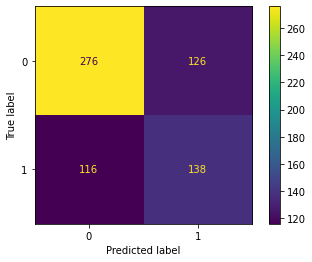

In [130]:
#Printing the classification report for the Bagging GridSearch model
print(classification_report(y_test, y_pred_bagging))

#Printing a confusion matrix for the Bagging GridSearch model
print(plot_confusion_matrix(bagging_GridSearch, X_test, y_test))

## Creating Gradient Boosting Classifier With Grid Search

In [131]:
#Hyperparameters to use in model
n_estimators_gb = [60,70,80,100,200,300,400,500,600,700]

#Creating the hyperparameter grid
param_grid_gb = {'n_estimators': n_estimators_gb}


In [132]:
#Instantiating the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

#Instantiating the GridSearch for the GradientBoostingClassifier model
gb_GridSearch = GridSearchCV(gb_model, param_grid = param_grid_gb, cv = 5, n_jobs = -1)

#Fitting the training data to the GradientBoosting GridSearch model
gb_GridSearch.fit(X_train, y_train)

#Predicting using the fitted GradientBoosting GridSearch model
y_pred_gb = gb_GridSearch.predict(X_test)

print('Best params: ', gb_GridSearch.best_params_)

print('Best score: ', gb_GridSearch.best_score_)

Best params:  {'n_estimators': 700}
Best score:  0.6525777444184437


              precision    recall  f1-score   support

           0       0.69      0.62      0.65       402
           1       0.48      0.56      0.52       254

    accuracy                           0.59       656
   macro avg       0.58      0.59      0.58       656
weighted avg       0.61      0.59      0.60       656



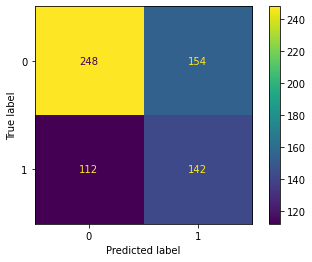

In [133]:
#Printing a classification report for the GradientBoosting GridSearch model
print(classification_report(y_test, y_pred_gb))

#Printing a confusion matrix for the GradientBoosting GridSearch model
print(plot_confusion_matrix(gb_GridSearch, X_test, y_test))

## Creating a Voting Classifier 

In [134]:
#Renaming models to make them easier to work with
clf1 = rf_RandomGrid
clf2 = bagging_GridSearch
clf3 = gb_GridSearch

#New list of labels to iterate with
labels = ['Random Forest', 'Bagging Classifier', 'Gradient Boosting', 
                       'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

#Creating a Voting Classifier with 'hard' parameter
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                            (labels[1], clf2),
                                            (labels[2], clf3)],
                                             voting = 'hard')


#Creating a Voting Classifier with 'soft' parameter
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                            (labels[1], clf2),
                                            (labels[2], clf3)],
                                             voting = 'soft')

#Creating for loop to iterate through all of the models and generate accuracy score
for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard, 
                         voting_clf_soft], labels):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv = 5,
                                             scoring = 'precision')
    
    print("Precision: %0.2f (+/- %0.2f) [%s]"
         % (scores.mean(), scores.std(), label))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Precision: 0.70 (+/- 0.03) [Random Forest]
Precision: 0.70 (+/- 0.03) [Bagging Classifier]
Precision: 0.65 (+/- 0.02) [Gradient Boosting]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Precision: 0.70 (+/- 0.02) [Voting_Classifier_Hard]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds f

**From the above information it seems like the Random Forest Classifier is the best model to go forward with, and hyperparameter tuning did not improve model performance drastically.**